<a href="https://colab.research.google.com/github/Location-Artistry/GEO-DEV-NOTEBOOKS/blob/main/30_DAY_MAP_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **30 DAY MAP CHALLENGE**
## Scripts & Scrapers for Map Data
## Stay Calm and Map ON
Several automated scrips and Beautiful Soup scraping libraries to programmatically fetch data from websites.
Utilize Beautiful Soup4 and Google Libraries to search state websites


In [ ]:
!pip install search-engine-parser
!pip install "search-engine-parser[cli]"
!pip install beautifulsoup4 #- already installed with Colab
!pip install git+https://github.com/abenassi/Google-Search-API
!pip install sodapy

import pandas as pd
import requests
import nest_asyncio
from bs4 import BeautifulSoup
from search_engine_parser import GoogleSearch
from googlesearch import search 
from googleapi import google
from IPython.display import IFrame
from sodapy import Socrata
import getpass

nest_asyncio.apply()


# GDAL/geoPandas libraries
# New method due to authentication 11/02/2021
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install pygeos 

!git clone https://github.com/geopandas/geopandas.git
!pip install geopandas
import geopandas as gpd
import ogr
!pip install contextily
import contextily as ctx

import matplotlib.pyplot as plt 
import os

!pip install mapclassify
!pip install folium -U
import folium
from mapclassify import classify

In [ ]:
# Site with nice pre-made lists of all US states separated by commas
https://sceptermarketing.com/comma-separated-lists-of-us-states-abbreviations-select-options-etc/
# Open Data Network, Socrata compilation of states and regions!
https://www.opendatanetwork.com/
# Links of all states Open Data Portals!
http://www.harker.com/OpenData/socrata-data-portals.html

## Scrape wikipedia with Beautiful Soup for largest US cites list

In [ ]:
# Scrape page contents
URL = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
# get all tables from page, and print number of tables
wikiTables = soup.find_all("table", attrs={"class": "wikitable sortable"})
len(wikiTables)

4

In [ ]:
# searching through table data inspect if it is the target
table = wikiTables[0]
body = table.find_all("tr")
head = body[0]
head

<tr>
<th>2020<br/>rank
</th>
<th>City
</th>
<th>State<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[c]</a></sup>
</th>
<th>2020<br/>census
</th>
<th>2010<br/>census
</th>
<th>Change
</th>
<th colspan="2">2020 land area
</th>
<th colspan="2">2020 population density
</th>
<th>Location
</th></tr>

#### We've got the correct table listing the 50 largest US cities by population   
Now let's load the table rows into a pandas dataframe

In [ ]:
# Create the header row and strip the '\n' from the text
headings = []
for item in head.find_all("th"): # loop through all th elements
    item = (item.text).rstrip("\n")
    headings.append(item)
print(headings)

['2020rank', 'City', 'State[c]', '2020census', '2010census', 'Change', '2020 land area', '2020 population density', 'Location']


In [ ]:
# get all rows except the header to load into dataframe
body_rows = body[1:] # All other items becomes the rest of the rows

In [ ]:
all_rows = [] 
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will hold entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        row.append(row_item.text)
    all_rows.append(row)
# print(all_rows)

In [ ]:
df = pd.DataFrame(data=all_rows,columns=headings)
df.describe()

Resulting in "AssertionError: 9 columns passed, passed data had 11 columns"
Some of the rows are showing 11 columns


In [ ]:
# Ah ha! 9 heading though 11 columns due to separate columns for both sq mi and sq km!
for i, heads in enumerate(headings):
  display(f'{i} - {heads}')

'0 - 2020rank'

'1 - City'

'2 - State[c]'

'3 - 2020census'

'4 - 2010census'

'5 - Change'

'6 - 2020 land area'

'7 - 2020 land area km'

'8 - 2020 population density'

'9 - 2020 pop density sq km'

'10 - Location'

In [ ]:
# added additional header rows to match row columns
headings.insert(7, '2020 land area km')
headings.insert(9, '2020 pop density sq km')

### Now attempting to load into dataframe with correct column numbers!

In [ ]:
all_rows = [] 
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will hold entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        rowText = (row_item.text).rstrip("\n")
        rowText = (rowText).rstrip("[d]")
        row.append(rowText.rstrip())
    all_rows.append(row)

In [ ]:
# Success!
df = pd.DataFrame(data=all_rows,columns=headings)
df.describe()

,2020rank,City,State[c],2020census,2010census,Change,2020 land area,2020 land area km,2020 population density,2020 pop density sq km,Location
count,326,326,326,326,326,326,326,326,326,326,326
unique,326,316,46,326,322,306,296,296,315,306,326
top,201,Springfiel,California,"150,227","197,899",+2.38%,23.5 sq mi,60.9 km2,"4,888/sq mi","1,887/km2",34°56′N 120°26′W﻿ / ﻿34.93°N 120.44°W﻿ / 34.93...
freq,1,3,75,1,2,2,3,3,3,3,1


In [ ]:
df.head().T

,0,1,2,3,4
2020rank,1,2,3,4,5
City,New York,Los Angeles,Chicago,Houston,Phoenix
State[c],New York,California,Illinois,Texas,Arizona
2020census,"8,804,190","3,898,747","2,746,388","2,304,580","1,608,139"
2010census,"8,175,133","3,792,621","2,695,598","2,099,451","1,445,632"
Change,+7.69%,+2.80%,+1.88%,+9.77%,+11.24%
2020 land area,300.5 sq mi,469.5 sq mi,227.7 sq mi,640.4 sq mi,518.0 sq mi
2020 land area km,778.3 km2,"1,216.0 km2",589.7 km2,"1,658.6 km2","1,341.6 km2"
2020 population density,"29,298/sq mi","8,304/sq mi","12,061/sq mi","3,599/sq mi","3,105/sq mi"
2020 pop density sq km,"11,312/km2","3,206/km2","4,657/km2","1,390/km2","1,199/km2"


#### Adding rstrip to row processing eliminated unwanted characters

In [ ]:
# If remaining "\n" characters, use this method to remove
# removed additional '[a]' citations from city names
removeChars = ['\[e','\[f','\[g','\[h','\[i','\[j','\[k','\[l','\[m']
for chars in removeChars:
  df['City'] = df['City'].str.replace(chars, '')

In [ ]:
# slicing down to only the top 30 cities
df30 = df[0:-296]
df30.count()

2020rank                   30
City                       30
State[c]                   30
2020census                 30
2010census                 30
Change                     30
2020 land area             30
2020 land area km          30
2020 population density    30
2020 pop density sq km     30
Location                   30
dtype: int64

## Scraping for each of the 30 largest cities

In [ ]:
# use the search API to search for query= '{name of city} city open data'
# return top 3 results and save as dataframe
q = "open data"
dfRes = pd.DataFrame(columns = ['CITY','RANK','URL'])
for x, city in enumerate(df30['City']):
  print(f'{x} - {city}')
  for z, i in enumerate(search((f'{city} city {q}'), tld="com", num=3, stop=3, pause=2)):
    dfRes.loc[len(dfRes.index)] = [city,z,i]

0 - New York
1 - Los Angeles
2 - Chicago
3 - Houston
4 - Phoenix
5 - Philadelphia
6 - San Antonio
7 - San Diego
8 - Dallas
9 - San Jose
10 - Austin
11 - Jacksonville
12 - Fort Worth
13 - Columbus
14 - Indianapolis
15 - Charlotte
16 - San Francisco
17 - Seattle
18 - Denver
19 - Washington
20 - Nashville
21 - Oklahoma City
22 - El Paso
23 - Boston
24 - Portlan
25 - Las Vegas
26 - Detroit
27 - Memphis
28 - Louisville
29 - Baltimore


In [ ]:
# Check resulting dataframe for search results
dfRes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CITY    90 non-null     object
 1   RANK    90 non-null     object
 2   URL     90 non-null     object
dtypes: object(3)
memory usage: 2.8+ KB


In [ ]:
# everything looks good!
dfRes.head(12)

,CITY,RANK,URL
0,New York,0,https://opendata.cityofnewyork.us/
1,New York,1,https://data.ny.gov/
2,New York,2,http://www.nyc.gov/html/data/about.html
3,Los Angeles,0,https://data.lacity.org/
4,Los Angeles,1,https://www.lacity.org/residents/popular-infor...
5,Los Angeles,2,https://data.lacounty.gov/
6,Chicago,0,https://data.cityofchicago.org/
7,Chicago,1,https://data.cityofchicago.org/browse
8,Chicago,2,https://data.cityofchicago.org/browse?category...
9,Houston,0,https://data.houstontx.gov/


In [ ]:
# save to CSV file
dfRes.to_csv('MapChalData2021.csv',encoding='utf-8')

### First Phase Completed
 Scraped wikipedia list of largest US cities by population with Beautiful Soup, parsed list into a dataframe, cleaned extraneous text, reduced list from 326 to top 30 cities per 30 day challenge, one city per day.   
Automated a search of the 30 cities with the 'open data' query to get the top 3 hit URLs for each city, loaded these entries into the resulting dataframe, exported as CSV -> /content/drive/MyDrive/CODE-2022/30DayMap2021/MapChalData2021.csv

In [ ]:
# let's read that dataframe back in as a CSV
df = pd.read_csv('/content/drive/MyDrive/CODE-2022/30DayMap2021/MapChalData2021.csv')
df.head()

,Unnamed: 0,CITY,RANK,URL
0,0,New York,0,https://opendata.cityofnewyork.us/
1,1,New York,1,https://data.ny.gov/
2,2,New York,2,http://www.nyc.gov/html/data/about.html
3,3,Los Angeles,0,https://data.lacity.org/
4,4,Los Angeles,1,https://www.lacity.org/residents/popular-infor...


### Learning new method for opening URL programmtically within the notebook
Perhaps opening in a notebook cell could utilize cloud resources over my limited machine memory...

In [ ]:
dfSlice = df[0:3]
for url in dfSlice['URL']:
  IFrame(src='url', width='100%', height='800px')

In [ ]:
print(dfSlice['URL'])
#IFrame(src='url', width='100%', height='800px')

0         https://opendata.cityofnewyork.us/
1                       https://data.ny.gov/
2    http://www.nyc.gov/html/data/about.html
Name: URL, dtype: object


In [ ]:
IFrame(src=dfSlice['URL'][0], width='100%', height='800px')

### SODApy Open Data Portal Library
Many or most of the major city data portals utilize Socrata/SODA Open Data Network.  
Browsing through datasets via the web interface can be tedious, and time consuming to filter which sets contain geographic data.    
The library allows allows the creation of a client object given the open data base url.  This can then be queried into a dataframe, and the titles and tags for each dataset can be searched via pandas.

In [ ]:
# import python interface for Socrata Open Data Portals
!pip install sodapy
from sodapy import Socrata
import getpass

In [ ]:
# SODA Data Explorer Functions
def getDatasets(client, limit):
  data = client.datasets(limit=limit)
  dataList = []
  for i, x in enumerate(data):
    try:
      rec = {'name': x["resource"]["name"], 'domain': x["classification"]["domain_category"], 'url': x["permalink"], 'desc': x["resource"]["description"]}
      dataList.append(rec)
    except:
      display(f'{i} NAME: {x["resource"]["name"]} - URL: {x["permalink"]}')
      rec = {'name': x["resource"]["name"], 'domain': '', 'url': x["permalink"], 'desc': x["resource"]["description"]}
      dataList.append(rec)
  df = pd.DataFrame.from_dict(dataList)
  display(df.head())
  return df

def getClient(domain, API_KEY):
  user = getpass.getpass(prompt='SODA Username: ')
  p = getpass.getpass(prompt='Password: ')
  client = Socrata(domain, API_KEY, user, p)
  return client

In [ ]:
# give city of New York Open Data url as domain, no API key at this point
API_KEY = ''
domain = 'data.cityofnewyork.us'
client = getClient(domain,API_KEY)

SODA Username: ··········
Password: ··········


In [ ]:
# Create a dataframe and test with first 100 datasets
df = getDatasets(client,10000)
df.info()

'180 NAME: Mapped In NY Companies - URL: https://data.cityofnewyork.us/d/f4yq-wry5'

'263 NAME: NYC Truck Routes (Historical) - URL: https://data.cityofnewyork.us/d/spax-mybh'

'359 NAME: Center & Service Locations - URL: https://data.cityofnewyork.us/d/6smc-7mk6'

'420 NAME: DOHMH Farmers Markets - URL: https://data.cityofnewyork.us/d/8vwk-6iz2'

'485 NAME: Curbs - URL: https://data.cityofnewyork.us/d/ikvd-dex8'

'489 NAME: Storefronts Reported Leased or Not Leased - URL: https://data.cityofnewyork.us/d/uhbp-tz4s'

'589 NAME: Social Distancing: Parks Crowds Data - URL: https://data.cityofnewyork.us/d/gyrw-gvqc'

'689 NAME: Directory Of Business Improvement Districts - URL: https://data.cityofnewyork.us/d/qpm9-j523'

'692 NAME: 2015-2016 Demographic Data - Diversity Efforts - URL: https://data.cityofnewyork.us/d/tncb-agv4'

'717 NAME: DOHMH Farmers Markets (Map) - URL: https://data.cityofnewyork.us/d/fi97-k4k6'

'721 NAME: Licensed Wholesale Cigarette Dealers - URL: https://data.cityofnewyork.us/d/98b7-th5j'

'734 NAME: Yellow Tripdata 2015 - January - June - URL: https://data.cityofnewyork.us/d/2yzn-sicd'

'773 NAME: NYC Citywide Rolling Calendar Sales - URL: https://data.cityofnewyork.us/d/usep-8jbt'

'800 NAME: DSNY Litter Basket (Map) - URL: https://data.cityofnewyork.us/d/d6m8-cwh9'

'811 NAME: Community Districts (Water Areas Included) - URL: https://data.cityofnewyork.us/d/mzpm-a6vd'

'851 NAME: DSNY Litter Basket Inventory - URL: https://data.cityofnewyork.us/d/8znf-7b2c'

'860 NAME: DSNY - Solid Waste Management Freshkills documents - URL: https://data.cityofnewyork.us/d/yv6j-r66f'

'890 NAME: Parks Inspection Program – Inspections - URL: https://data.cityofnewyork.us/d/yg3y-7juh'

'913 NAME: Social Distancing and Enforcement: Parks Patrol Data - URL: https://data.cityofnewyork.us/d/yv25-wqf9'

'939 NAME: 311 Web Content - Services - URL: https://data.cityofnewyork.us/d/vwpc-kje2'

'973 NAME: Broadband Data Dig - Datasets - URL: https://data.cityofnewyork.us/d/ft4n-yqee'

'981 NAME: Automatic Public Toilets - URL: https://data.cityofnewyork.us/d/uzgy-xh4j'

'985 NAME: Parks Closure Status Due to COVID-19: Athletic Facilities - URL: https://data.cityofnewyork.us/d/g3xg-qtbc'

'1025 NAME: Parks Closure Status Due to COVID-19: Playgrounds - URL: https://data.cityofnewyork.us/d/a4qt-mpr5'

'1152 NAME: Parks Closure Status Due to COVID-19: Skate Parks - URL: https://data.cityofnewyork.us/d/pvvr-75zk'

'1155 NAME: GreenThumb Garden Info - URL: https://data.cityofnewyork.us/d/p78i-pat6'

'1161 NAME: Internet Master Plan: Broadband Choice and Speed by Census Block - URL: https://data.cityofnewyork.us/d/8ess-ssnw'

'1231 NAME: Social Distancing: Park Areas - URL: https://data.cityofnewyork.us/d/4iha-m5jk'

'1234 NAME: Sidewalk Centerline - URL: https://data.cityofnewyork.us/d/a9xv-vek9'

'1284 NAME: Dataset Removals - URL: https://data.cityofnewyork.us/d/tm5c-buy3'

'1288 NAME: DOHMH HIV Service Directory - URL: https://data.cityofnewyork.us/d/pwts-g83w'

'1340 NAME: Stealth Fiber Map - URL: https://data.cityofnewyork.us/d/u6su-4fpt'

'1397 NAME: DOF: Condominium Comparable Rental Income – Brooklyn – FY 2009/2010 - URL: https://data.cityofnewyork.us/d/w6yt-hctp'

"1399 NAME: Children's Play Areas (CPAs) - URL: https://data.cityofnewyork.us/d/j55h-3upk"

'1424 NAME: Parks Closure Status Due to COVID-19: Dog Runs - URL: https://data.cityofnewyork.us/d/wswf-9pts'

'1431 NAME: Ten-Year Capital Strategy - URL: https://data.cityofnewyork.us/d/b37a-3faw'

'1439 NAME: School Spending Since 1990 - URL: https://data.cityofnewyork.us/d/p26e-k6k9'

'1459 NAME: Social Distancing: Parks Ambassador Data - URL: https://data.cityofnewyork.us/d/98ef-fxnm'

'1464 NAME: Annual Report on Domestic Violence Initiatives, Indicators and Factors - URL: https://data.cityofnewyork.us/d/7t9i-jsfp'

'1471 NAME: Hyperlocal Temperature Monitoring - URL: https://data.cityofnewyork.us/d/qdq3-9eqn'

'1547 NAME: DOF: Summary of Neighborhood Sales Citywide Class 1-, 2- and 3-Family homes - URL: https://data.cityofnewyork.us/d/6rf2-gv9k'

'1577 NAME: 2016 NYC Open Data Plan: FOIL Summary Statistics - URL: https://data.cityofnewyork.us/d/a5ru-ygsr'

'1613 NAME: 2018 Central Park Squirrel Census - Hectare Grid - URL: https://data.cityofnewyork.us/d/qad5-y26n'

'1629 NAME: Cable Franchise Areas - URL: https://data.cityofnewyork.us/d/fw3w-apxs'

'1640 NAME: Proxy Voting Records - URL: https://data.cityofnewyork.us/d/fpxc-zjtm'

'1645 NAME: 2018 Squirrel Census - Hectare Grid Map - URL: https://data.cityofnewyork.us/d/t572-gp5u'

'1653 NAME: Cool It! NYC 2020 - Cooling Sites - URL: https://data.cityofnewyork.us/d/h2bn-gu9k'

'1672 NAME: Recreational Boating Permits - URL: https://data.cityofnewyork.us/d/idfb-y78n'

"1678 NAME: NYC Early Intervention's: Local Early Intervention Coordinating Council (LEICC) Report - URL: https://data.cityofnewyork.us/d/brud-mdtt"

'1762 NAME: Compostable Bag Retailers in NYC - URL: https://data.cityofnewyork.us/d/e2sz-2mmc'

'1783 NAME: Tax Liability By AGI Range - URL: https://data.cityofnewyork.us/d/3vvi-fwjs'

'1795 NAME: Parks Closure Status Due to COVID-19: Comfort Stations - URL: https://data.cityofnewyork.us/d/i5n2-q8ck'

'2047 NAME: Broadband Adoption and Infrastructure by Council District - URL: https://data.cityofnewyork.us/d/cgwq-3ie6'

'2061 NAME: Tobacco Retail Dealer and Electronic Cigarette Retail Dealer Caps by Community District (2021) - URL: https://data.cityofnewyork.us/d/43je-8syt'

'2129 NAME: Independent Budget Office: NYC COVID 19 Spending by Date - Citywide and by Agency - URL: https://data.cityofnewyork.us/d/ke6f-vhnd'

'2144 NAME: Tax Credits By Agi Range - URL: https://data.cityofnewyork.us/d/nwet-nc6h'

'2171 NAME: GreenThumb Block-Lot - URL: https://data.cityofnewyork.us/d/fsjc-9fyh'

'2176 NAME: 2013-2019 Attendance Results - Borough - URL: https://data.cityofnewyork.us/d/viin-czfn'

'2199 NAME: 2013-2019 Attendance Results - District - URL: https://data.cityofnewyork.us/d/6yc2-gsz6'

'2261 NAME: Cool It! NYC 2020 - Drinking Fountains - URL: https://data.cityofnewyork.us/d/wxhr-qbhz'

'2338 NAME: School Bus Route Reporting April2020_21_996 - July 1, - December 31, 2019 - URL: https://data.cityofnewyork.us/d/s6qk-qkvb'

'2370 NAME: Broadband Adoption and Infrastructure by Congressional District - URL: https://data.cityofnewyork.us/d/3kx3-7svp'

'2384 NAME: 2016-2017 School Quality Reports Results - Pre-K Programs - URL: https://data.cityofnewyork.us/d/tukx-dsca'

'2389 NAME: 2013-2019 Attendance Results - Citywide - URL: https://data.cityofnewyork.us/d/eqhe-kbrh'

'2478 NAME: CPAs - URL: https://data.cityofnewyork.us/d/asdj-rj9b'

'2536 NAME: 2017- 2018 Class Size Report District K-8 Average Class Size - URL: https://data.cityofnewyork.us/d/pkhy-wwga'

'2609 NAME: Compostable Bag Retailers in NYC (Map) - URL: https://data.cityofnewyork.us/d/hm5s-pgts'

'2610 NAME: DOHMH and DEP Waterborne Disease Risk Assessment Program Annual Report Data: Percentage of interviewed cryptosporidiosis case-patients reporting selected potential risk exposures before disease onset, by Immune Status - URL: https://data.cityofnewyork.us/d/ws4r-n9v4'

'2725 NAME: Vehicle Auction List - URL: https://data.cityofnewyork.us/d/ynic-uz5i'

'2739 NAME: Cool It! NYC 2020 - Spray Showers - URL: https://data.cityofnewyork.us/d/tzuk-eq2f'

'2785 NAME: 2016-2017 EMS Transport Final - 6 Month/Date of Birth/Race/IEP - URL: https://data.cityofnewyork.us/d/89bd-raqa'

'2790 NAME: NYC Wetlands Map - URL: https://data.cityofnewyork.us/d/7piy-bhr9'

'2796 NAME: NYC Wetlands - URL: https://data.cityofnewyork.us/d/p48c-iqtu'

'2827 NAME: 2015-2016 Demographic Data - Grades 9-12 District - URL: https://data.cityofnewyork.us/d/eg75-mh9k'

'2845 NAME: 2021 Open Data Plan: Future Releases - URL: https://data.cityofnewyork.us/d/acdt-2zt9'

'2852 NAME: 2021 City Council February Attendance - URL: https://data.cityofnewyork.us/d/vxn4-gvgm'

'2882 NAME: DVS Assistance Requests - URL: https://data.cityofnewyork.us/d/jup5-7fik'

'3012 NAME: 2017-2018 EMS Transport Final Race - URL: https://data.cityofnewyork.us/d/egnf-uyp9'

'3087 NAME: 2021 Open Data Plan: FOIL Datasets - URL: https://data.cityofnewyork.us/d/ckva-rq3b'

'3202 NAME: DOB Sustainability Compliance Map - URL: https://data.cityofnewyork.us/d/4hxk-b29t'

'3233 NAME: 2021 Open Data Plan: Website Data - URL: https://data.cityofnewyork.us/d/ug3g-mdky'

'3287 NAME: Independent Budget Office: NYC COVID 19 Cumulative Spending by Expense Type - URL: https://data.cityofnewyork.us/d/khqt-g67n'

'3321 NAME: 2021 Open Data Plan: Removals - URL: https://data.cityofnewyork.us/d/ywm2-wzzf'

'3344 NAME: 2021 Open Data Plan: Completed Civic Engagements - URL: https://data.cityofnewyork.us/d/5sbz-5u89'

'3350 NAME: 2021 Open Data Plan: FOIL Metrics - URL: https://data.cityofnewyork.us/d/rcf4-4vq6'

'3375 NAME: DOHMH COVID-19 Antibody-by-Sex - URL: https://data.cityofnewyork.us/d/bhau-5xgs'

'3378 NAME: DOHMH COVID-19 Antibody-by-Modified ZIP Code Tabulation Area - URL: https://data.cityofnewyork.us/d/6qs8-44ki'

'3393 NAME: DOHMH COVID-19 Antibody-by-Week - URL: https://data.cityofnewyork.us/d/cqhz-kkvd'

,name,domain,url,desc
0,DOB Job Application Filings,Housing & Development,https://data.cityofnewyork.us/d/ic3t-wcy2,This dataset contains all job applications sub...
1,Civil Service List (Active),City Government,https://data.cityofnewyork.us/d/vx8i-nprf,A Civil Service List consists of all candidate...
2,TLC New Driver Application Status,Transportation,https://data.cityofnewyork.us/d/dpec-ucu7,THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....
3,For Hire Vehicles (FHV) - Active,Transportation,https://data.cityofnewyork.us/d/8wbx-tsch,"<b>PLEASE NOTE:</b> This dataset, which includ..."
4,For Hire Vehicles (FHV) - Active Drivers,Transportation,https://data.cityofnewyork.us/d/xjfq-wh2d,"<b>PLEASE NOTE:</b> This dataset, which includ..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3408 non-null   object
 1   domain  3408 non-null   object
 2   url     3408 non-null   object
 3   desc    3408 non-null   object
dtypes: object(4)
memory usage: 106.6+ KB


In [ ]:
# 174 remaining entries
dfQ = df[df.desc.str.contains('geo')]
dfQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 20 to 3401
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    174 non-null    object
 1   domain  174 non-null    object
 2   url     174 non-null    object
 3   desc    174 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


In [ ]:
for index, row in dfQ.iterrows():
  print(f'{index} - {row["name"]} - {row["url"]} - {row["domain"]}')

20 - Building Footprints - https://data.cityofnewyork.us/d/nqwf-w8eh - Housing & Development
61 - 2010 Neighborhood Tabulation Areas (NTAs) - https://data.cityofnewyork.us/d/cpf4-rkhq - City Government
62 - Air Quality - https://data.cityofnewyork.us/d/c3uy-2p5r - Environment
79 - Department of Finance Digital Tax Map - https://data.cityofnewyork.us/d/smk3-tmxj - Housing & Development
102 - 2010 Census Tracts - https://data.cityofnewyork.us/d/fxpq-c8ku - City Government
122 - 1 foot Digital Elevation Model (DEM) - https://data.cityofnewyork.us/d/dpc8-z3jc - City Government
126 - NYPD Complaint Map (Year to Date) - https://data.cityofnewyork.us/d/2fra-mtpn - Public Safety
144 - 2010 Census Blocks - https://data.cityofnewyork.us/d/v2h8-6mxf - City Government
167 - TLC Driver Education 24 Hour Course Provider (Map) - https://data.cityofnewyork.us/d/mzrr-g56e - Transportation
206 - NYC Planimetrics - https://data.cityofnewyork.us/d/wt4d-p43d - Transportation
223 - Contours - https://data.c

In [ ]:
dfQ2 = dfQ[dfQ.name.str.contains('rodent')]
dfQ2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    0 non-null      object
 1   domain  0 non-null      object
 2   url     0 non-null      object
 3   desc    0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


In [ ]:
for index, row in dfQ2.iterrows():
    print(f'{index} - {row["name"]} - {row["domain"]}')

In [ ]:
# Total of 3405 layers for NYC Open Data!
dfQ3 = df[df.name.str.contains('rat')]
dfQ3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 45 to 3180
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    63 non-null     object
 1   domain  63 non-null     object
 2   url     63 non-null     object
 3   desc    63 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


In [ ]:
for index, row in dfQ3.iterrows():
    print(f'{index} - {row["name"]} - {row["url"]} - {row["domain"]}')

## Viewing NYC Open Data with GeoPandas
Needed to rework the Colab install at beginning of notebook due to changes in github security

In [ ]:
# New GeoDF class for working with GeoDataframes
class GeoDF:
  def __init__(self, dataPath):
    try:
      self.gdf = gpd.read_file(dataPath)    
      display(self.gdf.head())
    except:
        display(f'ERROR COULD NOT READ GeoDataFrame: {dataPath}')
  def p(self):
    try:
      display(self.gdf.plot())
    except:
      display(f'ERROR COULD NOT PLOT')  
  def toCRS(self, crs):
    try:
      self.gdf = self.gdf.to_crs(crs)
      display(f'Successfully changed Coordinate System to: {crs}')
    except:
      display(f'ERROR UNABLE TO REPORJECT Coordinate System to: {crs}')
  def spatialJoin(self, gdf2, method, crs = 0):
    try:
      if crs:
        self.gdf = self.gdf.to_crs(crs)
        gdf2 = gdf2.to_crs(crs)
      self.joinGDF = gpd.sjoin(self.gdf, gdf2, op=method)
      return self.joinGDF.head()
    except:
      display(f'ERROR SJOIN DID NOT WORK!')
  def exp(self):
    #try:
      return self.gdf.explore()
    #except:
      #display(f'EXPLORE FAILED')




In [ ]:
gdfURL = 'https://data.cityofnewyork.us/resource/p937-wjvj.geojson'
gdf = GeoDF(gdfURL)

,location_state,zip_code,house_number,x_coord,location_zip,approved_date,latitude,y_coord,result,location_address,job_ticket_or_work_order_id,bbl,location_city,job_id,longitude,street_name,inspection_date,block,inspection_type,job_progress,lot,boro_code,borough,geometry
0,,None,0000,None,,2021-07-09T11:33:07,0.00000000000000000000,None,Failed for Other R,,13252142,2024090050,,PC7732347,0.00000000000000000000,MELROSE AVENUE,2021-07-07T10:05:45,02409,Initial,1,0050,2,Bronx,POINT (0.00000 0.00000)
1,,None,000,None,,2011-11-14T15:28:40,0.00000000000000000000,None,Failed for Other R,,12802045,5011840160,,PC7500960,0.00000000000000000000,WENLOCK STREET,2011-11-10T14:50:52,01184,Compliance,2,0160,5,Staten Island,POINT (0.00000 0.00000)
2,None,None,000,0,None,2017-09-27T12:58:55,0.00000000000000000000,0,Passed,None,12990129,3089140016,None,PC7054124,0.00000000000000000000,Abbey Court,2017-09-26T14:00:25,8914,Compliance,2,16,3,Brooklyn,None
3,,None,10,1003704,,2017-09-14T14:41:03,0.00000000000000000000,240136,Passed,,12328443,2025390132,,PC6737067,0.00000000000000000000,MAJ WM DEEGAN BLVD,2017-09-12T14:45:42,02539,Initial,1,0132,2,Bronx,POINT (0.00000 0.00000)
4,,None,000,950510,,2016-06-07T14:35:38,0.00000000000000000000,169320,Passed,,11362643,5002210035,,PC7466087,0.00000000000000000000,Roe Street,2016-06-02T15:08:18,221,Initial,1,35,5,Staten Island,POINT (0.00000 0.00000)


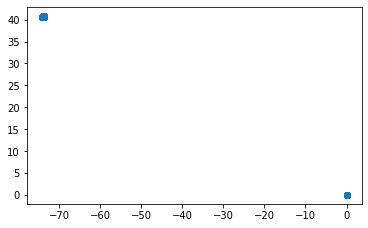

In [ ]:
gdf.p()

In [ ]:
# All NYC layers containing geo in description
dfQ = df[df.desc.str.contains('geo')]
dfQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 20 to 3401
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    174 non-null    object
 1   domain  174 non-null    object
 2   url     174 non-null    object
 3   desc    174 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


In [ ]:
dfBlocks = df[df.desc.str.contains('blocks')]
dfBlocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 75 to 3376
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    11 non-null     object
 1   domain  11 non-null     object
 2   url     11 non-null     object
 3   desc    11 non-null     object
dtypes: object(4)
memory usage: 440.0+ bytes


In [ ]:
for index, row in dfBlocks.iterrows():
    print(f'{index} - {row["name"]} - {row["url"]} - {row["domain"]}')

75 - NYC Wi-Fi Hotspot Locations - https://data.cityofnewyork.us/d/a9we-mtpn - Social Services
154 - NYC Wi-Fi Hotspot Locations - https://data.cityofnewyork.us/d/yjub-udmw - City Government
203 - NYC Wi-Fi Hotspot Locations Map - https://data.cityofnewyork.us/d/7agf-bcsq - City Government
487 - NYC Wi-Fi Hotspot Locations - https://data.cityofnewyork.us/view/66qr-66q7 - City Government
788 - MillionTreesNYC Block Planting Locations - https://data.cityofnewyork.us/d/vr8g-vfny - Environment
866 - Georeferenced NYC Zoning Maps - https://data.cityofnewyork.us/d/mxbm-493w - City Government
887 - Atomic Polygons - https://data.cityofnewyork.us/d/djze-f4qi - City Government
1476 - Hyperlocal Temperature Monitoring - https://data.cityofnewyork.us/d/qdq3-9eqn - 
1736 - Block Planting - https://data.cityofnewyork.us/d/h426-x5gi - Environment
1796 - Bridge Hold Location Stipulations - https://data.cityofnewyork.us/d/ge3f-inui - Transportation
3376 - DOHMH COVID-19 Antibody-by-Modified ZIP Code T

### Screening Open Data layers for 'geo' query seems to exclude some potentially important layers.  
May be better approach to conduct query over entire dataset

In [ ]:
dfSquirrel = df[df.name.str.contains('Squirrel')]
dfSquirrel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 49 to 1645
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   domain  6 non-null      object
 2   url     6 non-null      object
 3   desc    6 non-null      object
dtypes: object(4)
memory usage: 240.0+ bytes


In [ ]:
for index, row in dfSquirrel.iterrows():
    print(f'{index} - {row["name"]} - {row["url"]} - {row["domain"]}')

49 - 2018 Central Park Squirrel Census - Squirrel Data - https://data.cityofnewyork.us/d/vfnx-vebw - Environment
201 - 2018 Squirrel Census  Fur Color Map - https://data.cityofnewyork.us/d/fak5-wcft - Environment
801 - 2018 Central Park Squirrel Census - Stories - https://data.cityofnewyork.us/d/gfqj-f768 - Environment
876 - 2018 Central Park Squirrel Census - Hectare Data - https://data.cityofnewyork.us/d/ej9h-v6g2 - Environment
1613 - 2018 Central Park Squirrel Census - Hectare Grid - https://data.cityofnewyork.us/d/qad5-y26n - 
1645 - 2018 Squirrel Census - Hectare Grid Map - https://data.cityofnewyork.us/d/t572-gp5u - 


In [ ]:
# add GeoJSON to the SODA query
# Central Park squirrels!
url = 'https://data.cityofnewyork.us/resource/vfnx-vebw.geojson'
g = GeoDF(url)

,x,moans,primary_fur_color,hectare,foraging,specific_location,location,unique_squirrel_id,y,running,kuks,above_ground_sighter,shift,color_notes,tail_twitches,other_activities,age,highlight_fur_color,climbing,indifferent,runs_from,date,hectare_squirrel_number,quaas,approaches,eating,combination_of_primary_and,chasing,other_interactions,tail_flags,geometry
0,-73.9561344937861,False,None,37F,False,None,None,37F-PM-1014-03,40.7940823884086,False,False,None,PM,None,False,None,None,None,False,False,False,10142018,3,False,False,False,+,False,None,False,POINT (-73.95613 40.79408)
1,-73.9688574691102,False,None,21B,False,None,None,21B-AM-1019-04,40.7837825208444,False,False,None,AM,None,False,None,None,None,False,False,False,10192018,4,False,False,False,+,False,None,False,POINT (-73.96886 40.78378)
2,-73.9742811484852,False,Gray,11B,False,None,Above Ground,11B-PM-1014-08,40.775533619083,False,False,10,PM,None,False,None,None,None,False,False,False,10142018,8,False,False,False,Gray+,True,None,False,POINT (-73.97428 40.77553)
3,-73.9596413903948,False,Gray,32E,True,None,None,32E-PM-1017-14,40.7903128889029,False,False,None,PM,Nothing selected as Primary. Gray selected as ...,False,None,Adult,None,False,False,True,10172018,14,False,False,True,Gray+,False,None,False,POINT (-73.95964 40.79031)
4,-73.9702676472613,False,Gray,13E,True,on tree stump,Above Ground,13E-AM-1017-05,40.7762126854894,False,False,None,AM,None,False,None,Adult,Cinnamon,False,False,False,10172018,5,False,False,False,Gray+Cinnamon,False,None,False,POINT (-73.97027 40.77621)


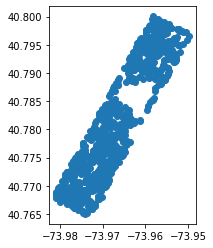

In [ ]:
g.p()

In [ ]:
g.exp()

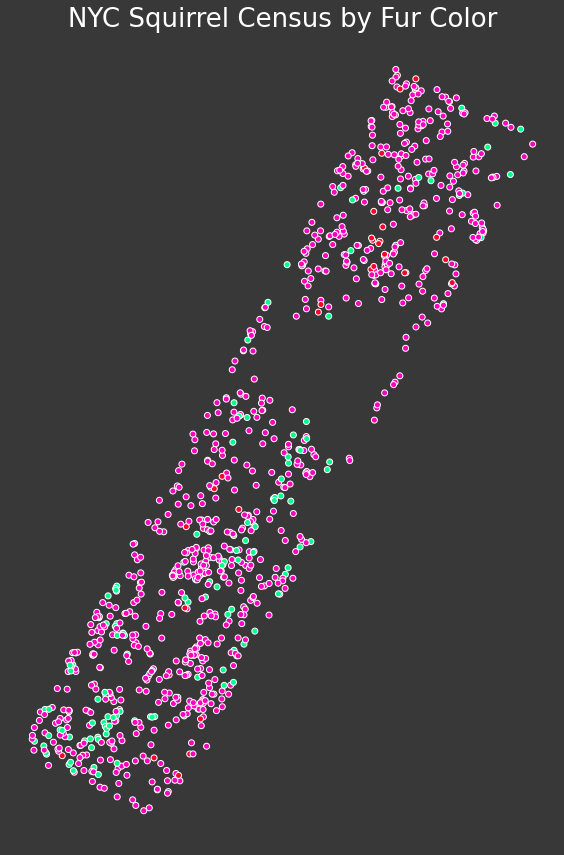

In [ ]:
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(20,15),facecolor='#383838')
# facecolor #383838 is matched exactly with Colab dark background
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
#gdf2.plot(ax=ax, column='Name', alpha=.5, cmap='Set3', linewidth=2)
#gdf2.boundary.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.8)
g.gdf.plot(ax=ax, column='primary_fur_color', legend=False, cmap='gist_rainbow', edgecolor='white', linewidth=1)
plt.title("NYC Squirrel Census by Fur Color", fontsize=26, color='white')
ax.set_axis_off()
plt.show()

In [ ]:
g.toCRS('EPSG:3857')

'Successfully changed Coordinate System to: EPSG:3857'

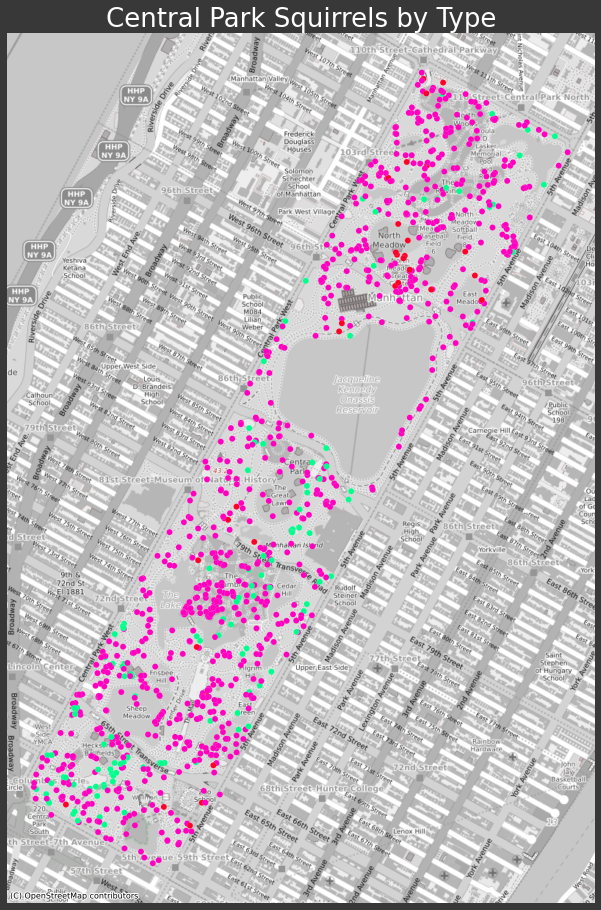

In [ ]:
# Add contextily basemap
fig, ax = plt.subplots(figsize=(20,16),facecolor='#383838')
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])

g.gdf.plot(ax=ax, column='primary_fur_color', legend=False, cmap='gist_rainbow', edgecolor='white', linewidth=.1)
plt.title("Central Park Squirrels by Type", fontsize=26, color='white')
ax.set_axis_off()

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.BlackAndWhite)